In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING THE DATA

In [2]:
#find available dataset names in seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
#convert the date to a YYYY-MM-DD format in a new column named yearMonth
df['yearMonth'] = "01-"+df['month'].astype(str)+"-"+df['year'].astype(str)
df.head()

,year,month,passengers,yearMonth
0,1949,Jan,112,01-Jan-1949
1,1949,Feb,118,01-Feb-1949
2,1949,Mar,132,01-Mar-1949
3,1949,Apr,129,01-Apr-1949
4,1949,May,121,01-May-1949


In [5]:
#yearMonth is of type object- we may have problems later, so convert it into datetime
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB
None


,year,month,passengers,yearMonth
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [6]:
#Make yearMonth as index
df.set_index('yearMonth',inplace=True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


## PLOTTING GRAPH

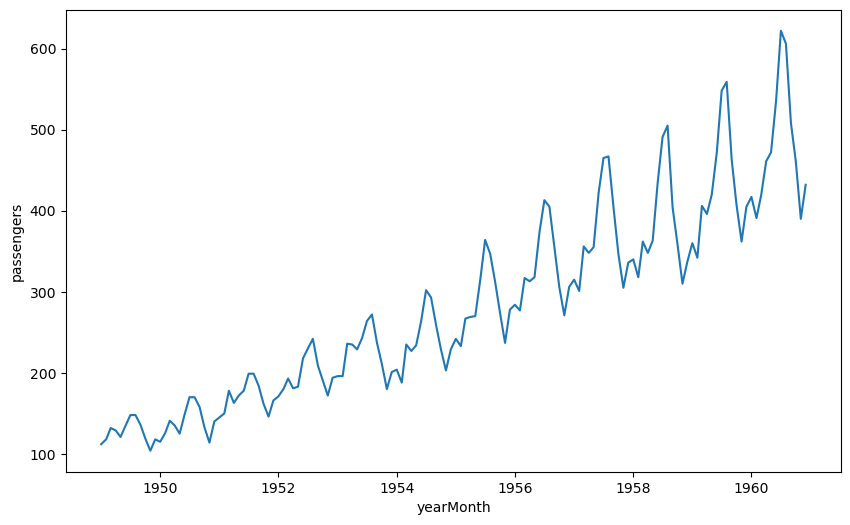

In [7]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x=df.index,y=df.passengers)
plt.show()

The graph will show patterns(eg seasonally data going up and down)
We see in our graph two patterns: seasonality and trends

In [8]:
# calculate the mean and plot rolling mean and sd for 12 month
df['rollMean'] =df.passengers.rolling(window = 12).mean()
df['rollStd'] = df.passengers.rolling(window = 12).std()
print(df['rollMean'])
print(df['rollStd'])

yearMonth
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: rollMean, Length: 144, dtype: float64
yearMonth
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
                ...    
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125
Name: rollStd, Length: 144, dtype: float64


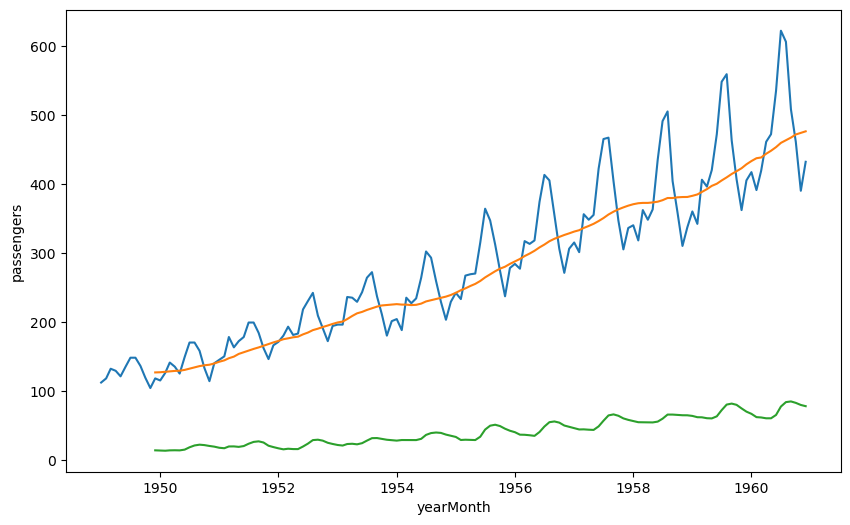

In [9]:
plt.figure(figsize = (10,6))
sns.lineplot(data = df,x = df.index,y = df.passengers)
sns.lineplot(data = df,x = df.index,y = df.rollMean)
sns.lineplot(data = df,x = df.index,y = df.rollStd)
plt.show()


In [10]:
#conclusion
#mean is not stationary ,sd is stationary,so our data is not stationary

In [11]:
#now let us perform the Adf test 
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(df.passengers)
print(adfTest) # let us interpret these values below by converting into a series

(0.8153688792060547, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


In [13]:
adf_statistic = adfTest[0]
p_value = adfTest[1]
critical_values = adfTest[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:", critical_values)

ADF Statistic: 0.8153688792060547
p-value: 0.9918802434376411
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [14]:
stats = pd.Series(adfTest[0:4],index = ['Test Statistic','p_value','#lagsused','number of observation used'])
print(stats)

Test Statistic                  0.815369
p_value                         0.991880
#lagsused                      13.000000
number of observation used    130.000000
dtype: float64


In [15]:
for key,values in adfTest[4].items():
    print("criticality" , key,":",values)


criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


we will see that our test statistic is greater than critical value in all cases ,so do not reject the null hypothisis it means that our data is not stationary  

In [16]:
def test_stationary(dataFrame,var):
    dataFrame['rollMean'] =dataFrame['variable'].rolling(window = 12).mean()
    dataFrame['rollStd'] = dataFrame['variable'].rolling(window = 12).std()
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame['variable'])
    stats = pd.Series(adfTest[0:4],index = ['Test Statistic','p_value',
                                            '#lagsused','number of observation used'])
    print(stats)
    for key,values in adfTest[4].items():
        print("criticality" , key,":",values)
    print(dataFrame['rollMean'])
    print(dataFrame['rollStd'])
    plt.figure(figsize = (10,6))
    sns.lineplot(data = dataFrame,x = dataFrame.index,y = var)
    sns.lineplot(data = dataFrame,x = dataFrame.index,y = dataFrame['rollMean'])
    sns.lineplot(data = dataFrame,x = dataFrame.index,y = dataFrame['rollStd'])
    plt.show()

In [17]:
#just get the passenger column into a new Dataframe for easier testing
air_df = df[['passengers']].copy() #double brackets beacause it is in list within a list
air_df

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [18]:
#by defalut , shift is by 1 time period(here,one month)
#create a new colomn whiich will contain the shifted value from passengers column 
air_df['shift'] = air_df.passengers.shift(10)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
air_df.head(20)

,passengers,shift,shiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,NaN,NaN
1949-07-01,148,NaN,NaN
1949-08-01,148,NaN,NaN
1949-09-01,136,NaN,NaN


/tmp/ipykernel_31713/4162484573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['rollMean'] =air_df['shiftDiff'].rolling(window = 12).mean()
/tmp/ipykernel_31713/4162484573.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['rollStd'] = air_df['shiftDiff'].rolling(window = 12).std()


Test Statistic                 -3.671914
p_value                         0.004526
#lagsused                      13.000000
number of observation used    120.000000
dtype: float64
criticality 1% : -3.486055829282407
criticality 5% : -2.8859430324074076
criticality 10% : -2.5797850694444446
yearMonth
1949-11-01          NaN
1949-12-01          NaN
1950-01-01          NaN
1950-02-01          NaN
1950-03-01          NaN
                ...    
1960-08-01    45.000000
1960-09-01    44.416667
1960-10-01    43.250000
1960-11-01    40.833333
1960-12-01    39.000000
Name: rollMean, Length: 134, dtype: float64
yearMonth
1949-11-01          NaN
1949-12-01          NaN
1950-01-01          NaN
1950-02-01          NaN
1950-03-01          NaN
                ...    
1960-08-01    85.004813
1960-09-01    84.216667
1960-10-01    83.926510
1960-11-01    85.622675
1960-12-01    85.339962
Name: rollStd, Length: 134, dtype: float64


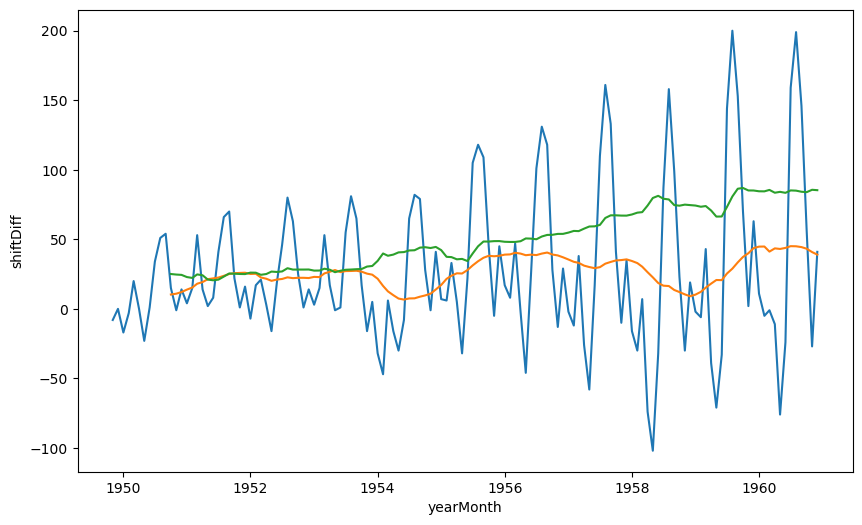

In [19]:
#Test Staionary
#test_stationary(air_df.dropna(),air_df['shiftDiff'])
air_df = air_df.dropna()
air_df['rollMean'] =air_df['shiftDiff'].rolling(window = 12).mean()
air_df['rollStd'] = air_df['shiftDiff'].rolling(window = 12).std()
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(air_df['shiftDiff'])
stats = pd.Series(adfTest[0:4],index = ['Test Statistic','p_value',
                                            '#lagsused','number of observation used'])
print(stats)
for key,values in adfTest[4].items():
    print("criticality" , key,":",values)
print(air_df['rollMean'])
print(air_df['rollStd'])
plt.figure(figsize = (10,6))
sns.lineplot(data = air_df,x = air_df.index,y = air_df['shiftDiff'])
sns.lineplot(data = air_df,x = air_df.index,y = air_df['rollMean'])
sns.lineplot(data = air_df,x = air_df.index,y = air_df['rollStd'])
plt.show()

# ARIMA

In [20]:
# create columns fro one month and oneyear lagged
airP = df[['passengers']].copy(deep=True)
airP['firstDiff']=airP['passengers'].diff()
airP['Diff12']=airP['passengers'].diff(12)